In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_path = 'data/ipl/'
match_df = pd.read_csv(data_path+'matches.csv')
score_df = pd.read_csv(data_path+'deliveries.csv')

In [5]:
# Top 5 Matches
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
match_df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
576,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


# Basic Statistics

In [8]:
# Basic statistics
print("Number of seasons : ",len(match_df.season.unique()))

Number of seasons :  9


In [13]:
# Number of matches
print("Number of matches played so far : ",match_df.shape[0])

Number of matches played so far :  577


# Number of matches played per season

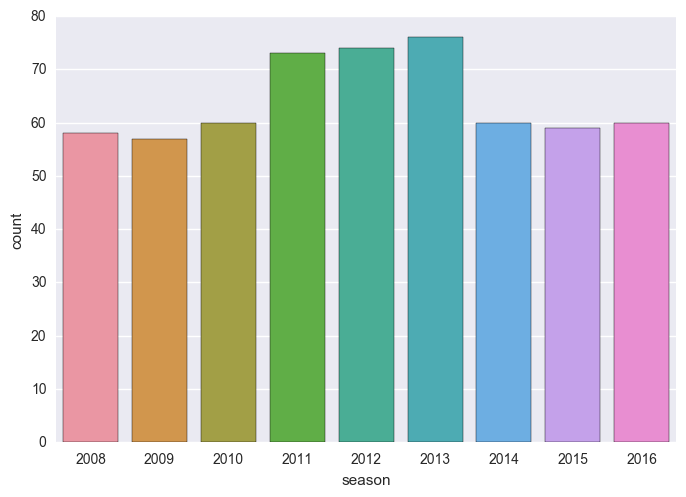

In [16]:
# Number of matches played per season
sns.countplot(x='season', data=match_df)
plt.show()

# Number of matches in each venue

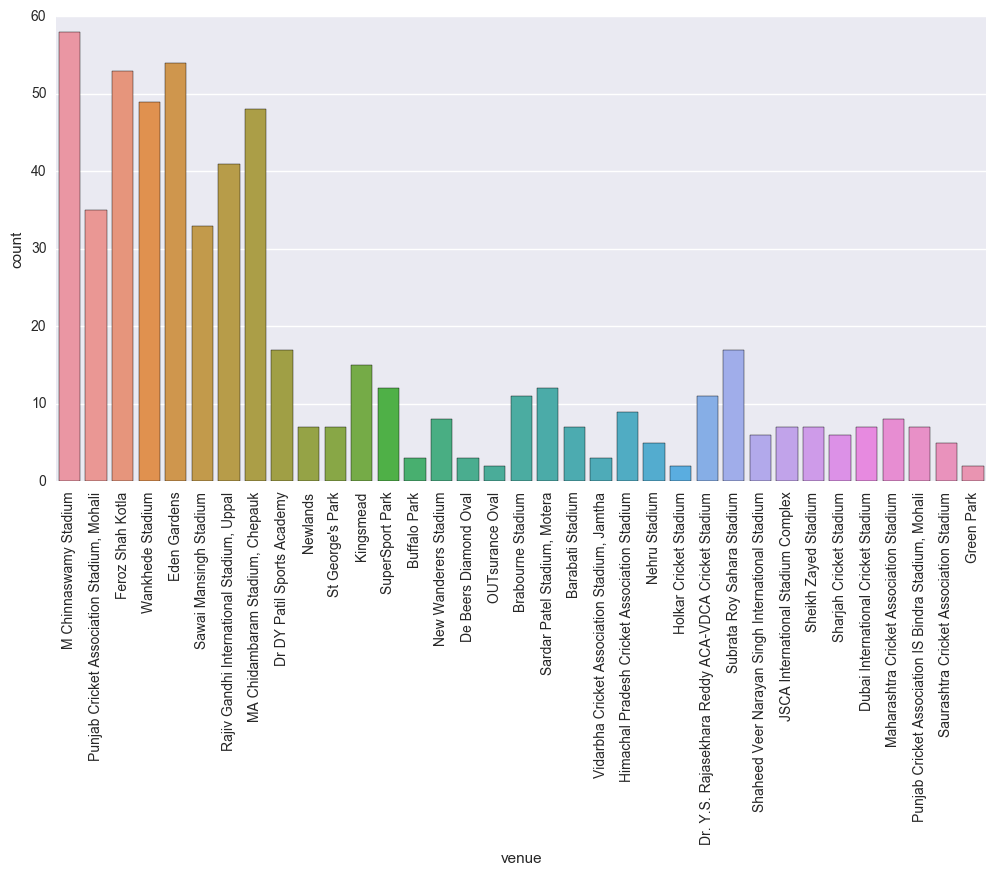

In [19]:
# Number of matches in each venue
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

# Number of matches played by each team

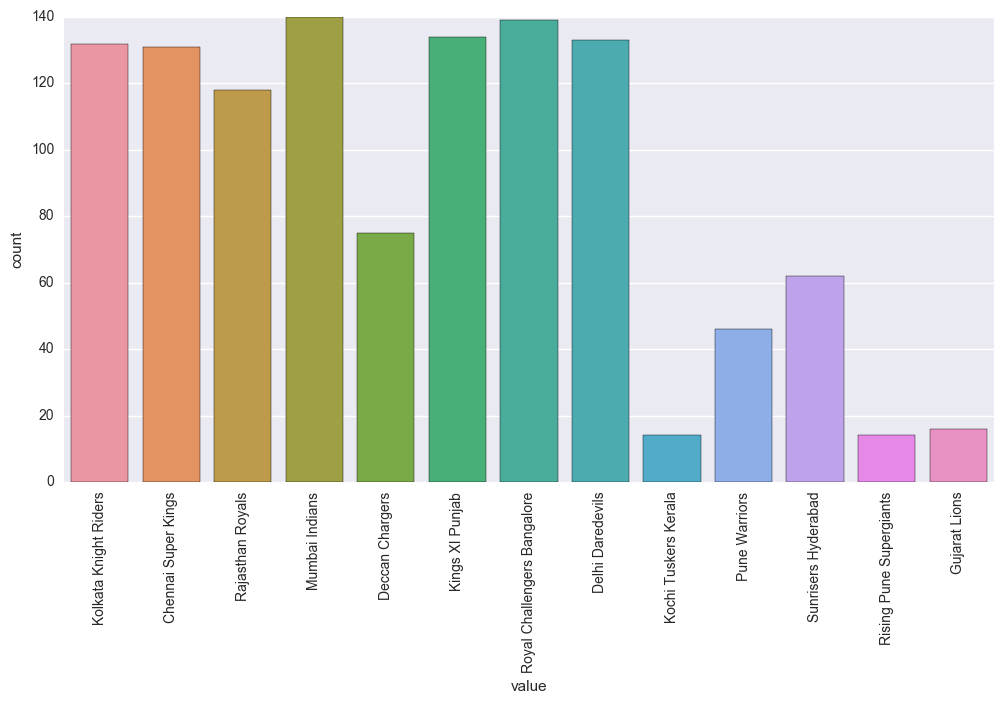

In [24]:
# Number of matches played by each team
temp_df = pd.melt(match_df, id_vars = ['id','season'], value_vars = ['team1','team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

# Number of wins per team

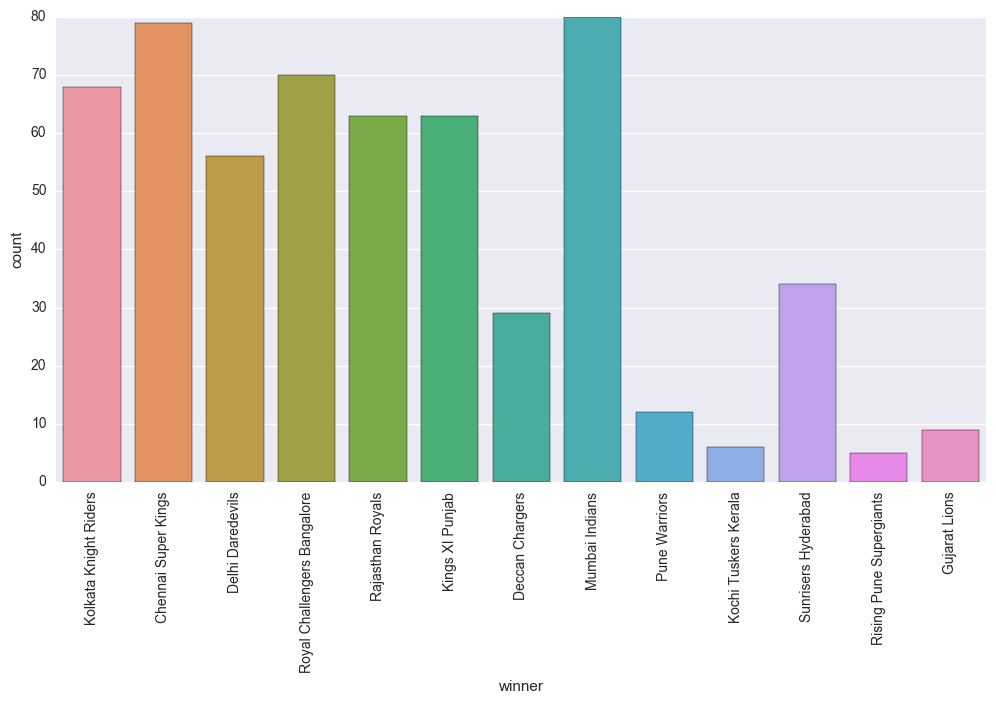

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

# Winner per season

In [28]:
temp_df = match_df.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
temp_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad


# Toss Decision

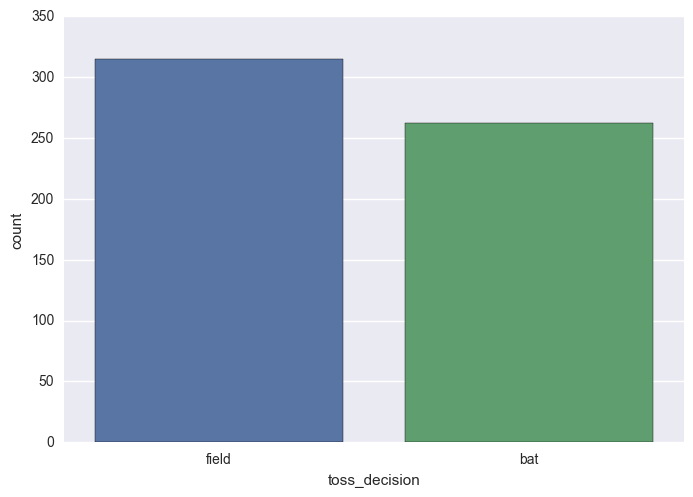

In [29]:
sns.countplot(x='toss_decision', data=match_df)
plt.show()

In [35]:
temp_series = match_df.toss_decision.value_counts()
temp_series

field    315
bat      262
Name: toss_decision, dtype: int64

In [37]:
labels = (np.array(temp_series.index))
labels

array(['field', 'bat'], dtype=object)

In [38]:
size = (np.array(temp_series/temp_series.sum()*100))
size

array([ 54.59272097,  45.40727903])

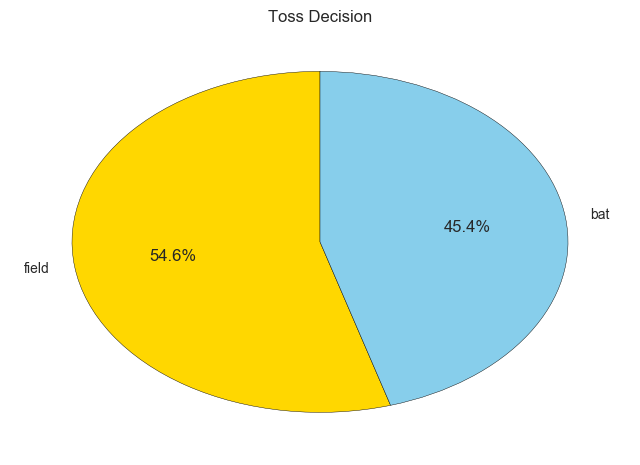

In [44]:
color = ['gold','skyblue']
plt.pie(size, labels = labels, colors = color, autopct = '%1.1f%%', startangle=90)
plt.title("Toss Decision")
plt.show()

# How toss decision varied over time

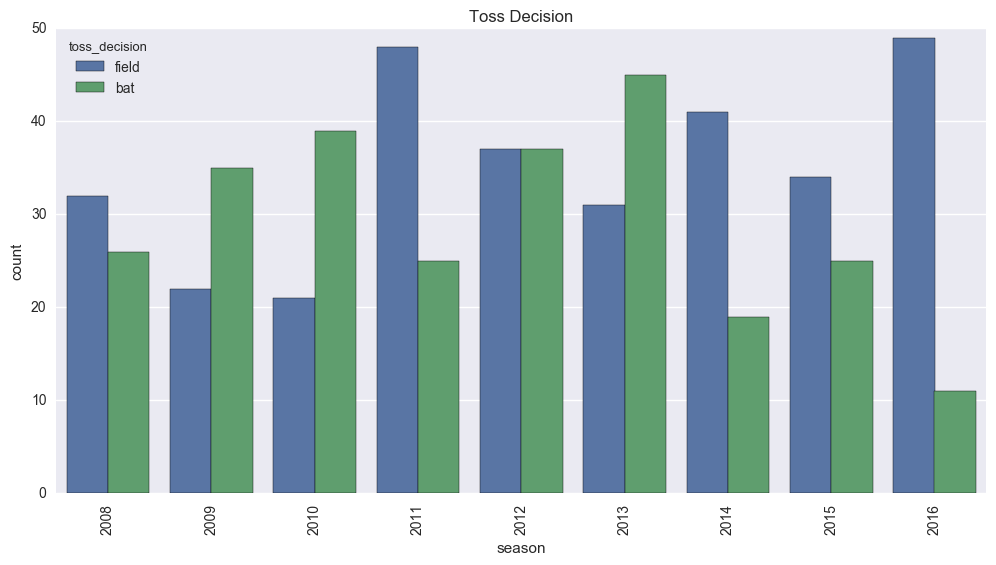

In [51]:
# How toss decision varied over time
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.title("Toss Decision")
plt.show()

In [45]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [49]:
score_df.shape

(136598, 21)